# POKEMON

### Analitika kitabxanalarının yüklənməsi və Datasetin Gətirilməsi

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\Asus\Downloads\Desktop\Handex\Pokemon layihəsi\Pokemon-layihəsi\Pokemon.xlsx")

#### Datasetdə ən çox yayılmış Pokemon növü hansıdır? Bu tip nə qədər Pokemon var?

In [3]:
df.groupby('type1')['type1'].count().sort_values(ascending = False).head(5)

type1
water      114
normal     105
grass       78
bug         72
psychic     53
Name: type1, dtype: int64

#### Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon varmı?

In [4]:
q1 = np.percentile(df['base_total'],25)
q3 = np.percentile(df['base_total'],75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound, upper_bound)
print(df['base_total'].min(), df['base_total'].max())

"""Burdan belə bir nəticə alırıq ki, datada base_total sütunundakı kəskin fərqlənən ədədlər 42.5dən kiçik, 782.5dən böyük ədədlərdir.
Lakin datada min ədəd 180 maksimum ədəd isə 780dir daha kiçik və ya daha böyük ədədlər yoxdur. Beləliklə digər növləri ilə müqayisədə
həddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon yoxdur"""

42.5 782.5
180 780


'Burdan belə bir nəticə alırıq ki, datada base_total sütunundakı kəskin fərqlənən ədədlər 42.5dən kiçik, 782.5dən böyük ədədlərdir.\nLakin datada min ədəd 180 maksimum ədəd isə 780dir daha kiçik və ya daha böyük ədədlər yoxdur. Beləliklə digər növləri ilə müqayisədə\nhəddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon yoxdur'

#### Pokemonun capture rate ilə onun base total arasında əlaqə varmı? Bəs onun nadirliyi (legendary və ya deyil)?

-0.7121201962428764
Menfi oldugu ucun ters elaqe var


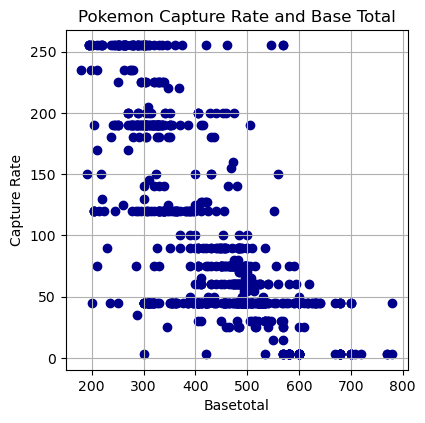

In [90]:
correl = df['capture_rate'].corr(df['base_total'])
print(correl)
if correl < 0:
    print('Menfi oldugu ucun ters elaqe var')
else:
    print('Duz mutenasib elaqe')
#Menfi alindigi ucun guclu ters mutenasib elaqe var deye bilerik.

plt.figure(figsize = (15,15))
plt.subplot(3, 3, 4)
plt.scatter(df['base_total'],df['capture_rate'],color='darkblue')
plt.title('Pokemon Capture Rate and Base Total')
plt.xlabel('Basetotal')
plt.ylabel('Capture Rate')
plt.grid(True)

-0.3282121307256078
Menfi oldugu ucun ters elaqe var


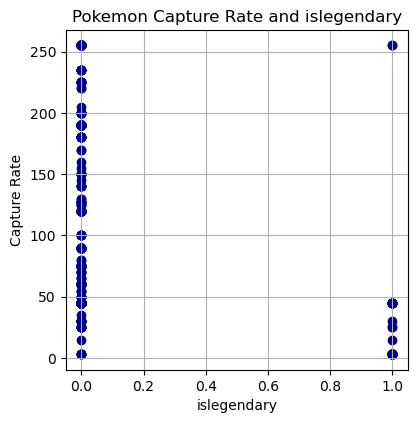

In [99]:
correl2 = df['capture_rate'].corr(df['is_legendary'])
print(correl2)
if correl < 0:
    print('Menfi oldugu ucun ters elaqe var')
elif correl == 0:
    print('Elaqe yoxdur')
else:
    print('Duz mutenasib elaqe')
    
plt.figure(figsize = (15,15))
plt.subplot(3, 3, 4)
plt.scatter(df['is_legendary'],df['capture_rate'],color='darkblue')
plt.title('Pokemon Capture Rate and islegendary')
plt.xlabel('islegendary')
plt.ylabel('Capture Rate')
plt.grid(True)

#### Hansı Pokemon ən yüksək hücum statistikasına malikdir?

In [9]:
df.groupby('name')['attack'].mean().sort_values(ascending = False).head(1)

name
Heracross    185.0
Name: attack, dtype: float64

#### Base total ilə HP, Attack, Defense, Special Attack, Special Defense və Speed kimi digər atributların hər biri arasında correlation nədir?

In [35]:
print('Base total ilə HP :', df['base_total'].corr(df['hp']))
print('Base total ilə Attack :', df['base_total'].corr(df['attack']))
print('Base total ilə Defense :' , df['base_total'].corr(df['defense']))
print('Base total ilə Special Attack :', df['base_total'].corr(df['sp_attack']))
print('Base total ilə Special Defense :', df['base_total'].corr(df['sp_defense']))
print('Base total ilə Speed :', df['base_total'].corr(df['speed']))

Base total ilə HP : 0.621061911515987
Base total ilə Attack : 0.7299978264684948
Base total ilə Defense : 0.63015121690635
Base total ilə Special Attack : 0.7409856986308718
Base total ilə Special Defense : 0.7179583541478467
Base total ilə Speed : 0.547575489079393


#### Əfsanəvi və əfsanəvi olmayan Pokemonun ortalama hücum  arasında əhəmiyyətli fərq varmı?

In [3]:
legendary = df[df['is_legendary'] == 0]['attack'].mean()
nolegendary = df[df['is_legendary'] == 1]['attack'].mean()
print('Legendary attack: ',legendary, 'nolegendary attack:',nolegendary)
ferq = legendary - nolegendary
print('Efsanevi ve efsanevi olmayan pokemonun ortalama hucumlari arasindaki ferq:',ferq)

Legendary attack:  74.80684931506849 nolegendary attack: 109.35714285714286
Efsanevi ve efsanevi olmayan pokemonun ortalama hucumlari arasindaki ferq: -34.55029354207437


#### Hansı tip 1 və tip 2 kombinasiyaları Pokemonlar arasında ən çox yayılmışdır?

In [24]:
df.groupby(['type1']+['type2'])['type1'].count().sort_values(ascending = False).head()

type1   type2 
normal  flying    26
grass   poison    14
bug     flying    13
        poison    11
water   ground     9
Name: type1, dtype: int64

#### Pokemonun çəkisi və boyu arasında korrelyasiya varmı?

In [100]:
corr = df['weight_kg'].corr(df['height_m'])
print(corr)
if corr > 0:
    print('duz mutenasib elaqe var')
elif corr == 0:
    print('Elaqe yoxdur')
else:
    print('ters mutenasib elaqe var')


0.626623070440067
duz mutenasib elaqe var


#### Hansı nəsil (generation) ən yüksək ortalama sürətə malikdir?

In [97]:
df.groupby('generation')['speed'].mean().sort_values(ascending = False).head(1)

generation
1    70.152318
Name: speed, dtype: float64

#### Base total paylanması əfsanəvi və əfsanəvi olmayan Pokemon arasında necə dəyişir?

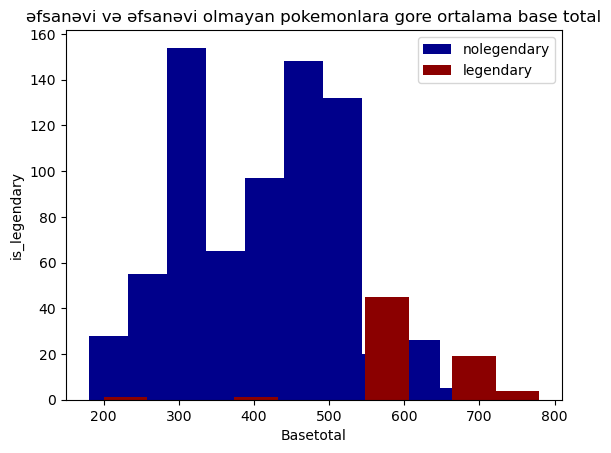

In [98]:
legendary = df[df['is_legendary'] == 1]['base_total']
nolegendary = df[df['is_legendary'] == 0]['base_total']

plt.hist(nolegendary,label = 'nolegendary', color = 'darkblue')
plt.hist(legendary,label = 'legendary',color = 'darkred')
plt.xlabel('Basetotal')
plt.ylabel('is_legendary')
plt.title('əfsanəvi və əfsanəvi olmayan pokemonlara gore ortalama base total')
plt.legend()
plt.show()

#### Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq varmı?

       type1    defense
2     dragon  86.259259
10    ground  83.906250
8      ghost  79.518519
11       ice  71.913043
9      grass  70.871795
0        bug  70.847222
1       dark  70.517241
13    poison  70.031250
14   psychic  69.264151
4      fairy  68.166667
6       fire  67.788462
5   fighting  66.392857
7     flying  65.000000
3   electric  61.820513
12    normal  59.695238


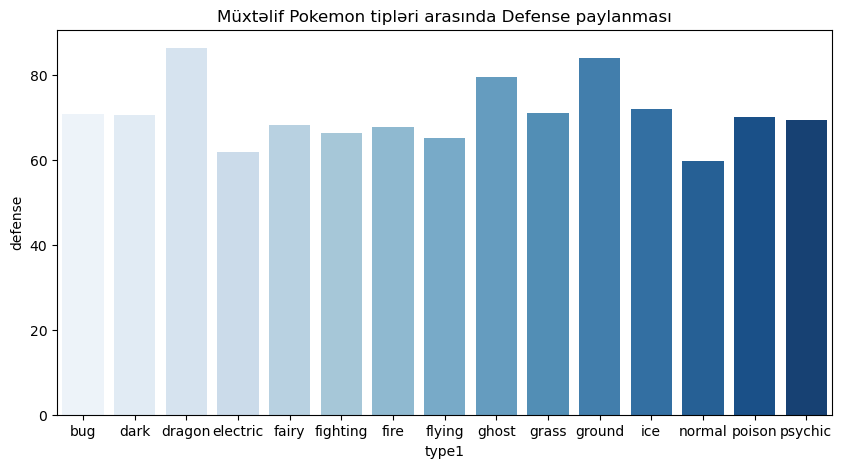

In [112]:
dfnew = df.groupby('type1')['defense'].mean().reset_index().head(15)
print(dfnew.sort_values('defense',ascending = False))
plt.figure(figsize=(10,5))
sns.barplot(x = dfnew['type1'], y = dfnew['defense'], palette = 'Blues')
plt.title('Müxtəlif Pokemon tipləri arasında Defense paylanması')
plt.show()
#Hesablamalara ve vizuala esasen deye bilerik ki, ehemiyyetli ferq yoxdur.

#### Pokemonun adını input kimi qəbul edən və onun statistikalarının olduğu lüğətini qaytaran funksiya yazın.

In [113]:
def pokemonstatistics():
    pokemonname = input('Pokemon adini daxil edin: ')
    
    if pokemonname in df['name'].values:
        pokemon_info_dict = {
            'base_total': df[df['name'] == pokemonname]['base_total'].loc[0],
            'hp': df[df['name'] == pokemonname]['hp'].loc[0],
            'attack': df[df['name'] == pokemonname]['attack'].loc[0],
            'defense': df[df['name'] == pokemonname]['defense'].loc[0],
            'sp_attack': df[df['name'] == pokemonname]['sp_attack'].loc[0],
            'sp_defense': df[df['name'] == pokemonname]['sp_defense'].loc[0],
            'speed': df[df['name'] == pokemonname]['speed'].loc[0]
        }
        return pokemon_info_dict
    else:
        return 'Pokemon adini duzgun daxil edin'

In [116]:
pokemonstatistics()

Pokemon adini daxil edin:  Bulbasaur


{'base_total': 318,
 'hp': 45,
 'attack': 49,
 'defense': 49,
 'sp_attack': 65,
 'sp_defense': 65,
 'speed': 45}

#### Percentage_male sütununda boş dəyərləri öz tipinin ortalaması ilə doldurun

In [117]:
for i in df['type1'].unique():
    tiportalamasi = df[df['type1'] == i]['percentage_male'].mean()
    df.loc[(df['type1'] == i) & (df['percentage_male'].isnull()), 'percentage_male'] = tiportalamasi

#### Daha çox kişiyə yaxın olan pokemonlar daha güclüdür, yoxsa qadına yaxın olanlar?

In [118]:
kisiyeyaxinolmafaizi = df[df['percentage_male'] >= 50]['base_total'].mean()
qadinayaxinolmafaizi = df[df['percentage_male'] < 50]['base_total'].mean()
if kisiyeyaxinolmafaizi > qadinayaxinolmafaizi:
    print('Kişiyə yaxın olan pokemonlar daha güclüdür')
else:
    print('Qadına yaxın olan pokemonlar daha güclüdür')

Qadına yaxın olan pokemonlar daha güclüdür


#### Əfsanəvi və ya əfsanəvi olmayan pokemonların ortalama çəkiləri və boyları arasında önəmli bir fərq var?

In [87]:
df.groupby('is_legendary')[['weight_kg','height_m']].mean()

,weight_kg,height_m
is_legendary,,
0,48.018425,1.056681
1,199.350725,2.281159


In [121]:
legendaryheigh = df[df['is_legendary'] == 1]['height_m'].mean()
nolegendaryheigh = df[df['is_legendary'] == 0]['height_m'].mean()
legendaryweight = df[df['is_legendary'] == 1]['weight_kg'].mean()
nolegendaryweight = df[df['is_legendary'] == 0]['weight_kg'].mean()

differenceofheigh = legendaryheigh - nolegendaryheigh
differenceofweight = legendaryweight - nolegendaryweight

print('Difference of heigh: ', differenceofheigh)
print('Difference of weight: ', differenceofweight)

#Cekiler arasinda ehemiyyetli ferq var. Amma boy ortalamalari arasinda ehemiyyetli ferq yoxdur.

Difference of heigh:  1.2244786889255794
Difference of weight:  151.33229988381333


#### Hansı tip1 və tip2 kombinasiyası daha xoşbəxtdir?

In [127]:
df.groupby(['type1']+['type2'])['base_happiness'].mean().sort_values(ascending = False).head()

type1    type2
grass    grass    100.0
fire     steel    100.0
         water    100.0
psychic  grass    100.0
         fire     100.0
Name: base_happiness, dtype: float64

#### Tiplər üzrə ortalama çəki və boyları tapın

In [124]:
df.groupby('type1')[['weight_kg','height_m']].mean()

,weight_kg,height_m
type1,,
bug,33.083333,0.883333
dark,69.096552,1.296552
dragon,107.125926,1.937037
electric,37.944737,0.981579
fairy,23.555556,0.794444
fighting,58.675000,1.196429
fire,66.096000,1.168000
flying,52.000000,1.166667
ghost,69.570370,1.251852


In [125]:
df.groupby('type2')[['weight_kg','height_m']].mean()

,weight_kg,height_m
type2,,
bug,35.740000,1.020000
dark,67.058824,1.270588
dragon,235.358824,2.388235
electric,57.612500,1.025000
fairy,16.665517,0.744828
fighting,85.460000,1.416000
fire,52.075000,1.108333
flying,50.948936,1.358511
ghost,65.015385,1.461538


### Mən oynamaq üçün ən ideal pokemonu seçmək istəsəm, hansını seçməliyəm? Bunun üçün özünüzə uyğun xüsusi bir analiz aparın və seçdiyiniz pokemonu əsaslandırın

In [78]:
"""Mənim üçün Ən ideal pokemon attact, defense, speed, hp, sp_attack və sp_defense kimi statistik göstəriciləri yuksek olan pokemondur. 
Bu statistik göstəricilərin cəmi base_total sütununda göstərilir. 
Bu zaman hesablamalar aparsaq ən yuxarı göstəriciyə malik iki pokemonun olduğunu görə bilərik"""
df.groupby('name')['base_total'].mean().sort_values(ascending = False).head()

#Statistikası ən yuxarı olan pokemon adlarını çıxarırıq.
df['pokemonstatisctics'] = df['base_total']
idealpokemonlar = df[df['pokemonstatisctics'] == df['pokemonstatisctics'].max()]

# Daha sonra hemen pokemonlarin capture rateinə baxırıq.Tutulma ehtimalı yuxarı olan pokemon ideal pokemon hesab edirəm.
ideal = idealpokemonlar[idealpokemonlar['capture_rate'] == idealpokemonlar['capture_rate'].max()]

ideal

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male,pokemonstatisctics
383,384,Rayquaza,dragon,flying,780,105,180,100,180,100,115,7.0,206.5,1,3,45,0,NaN,780


#### Apardığınız analizlərin nəticəsinə uyğun olaraq vizuallaşdırmalar aparın və bir dashboard qurun

In [8]:
legendary = df[df['is_legendary'] == 1]['base_total']
nolegendary = df[df['is_legendary'] == 0]['base_total']

In [42]:
dfanalyse = df.groupby('type1')['base_total'].mean().sort_values(ascending = False).reset_index().head(10)

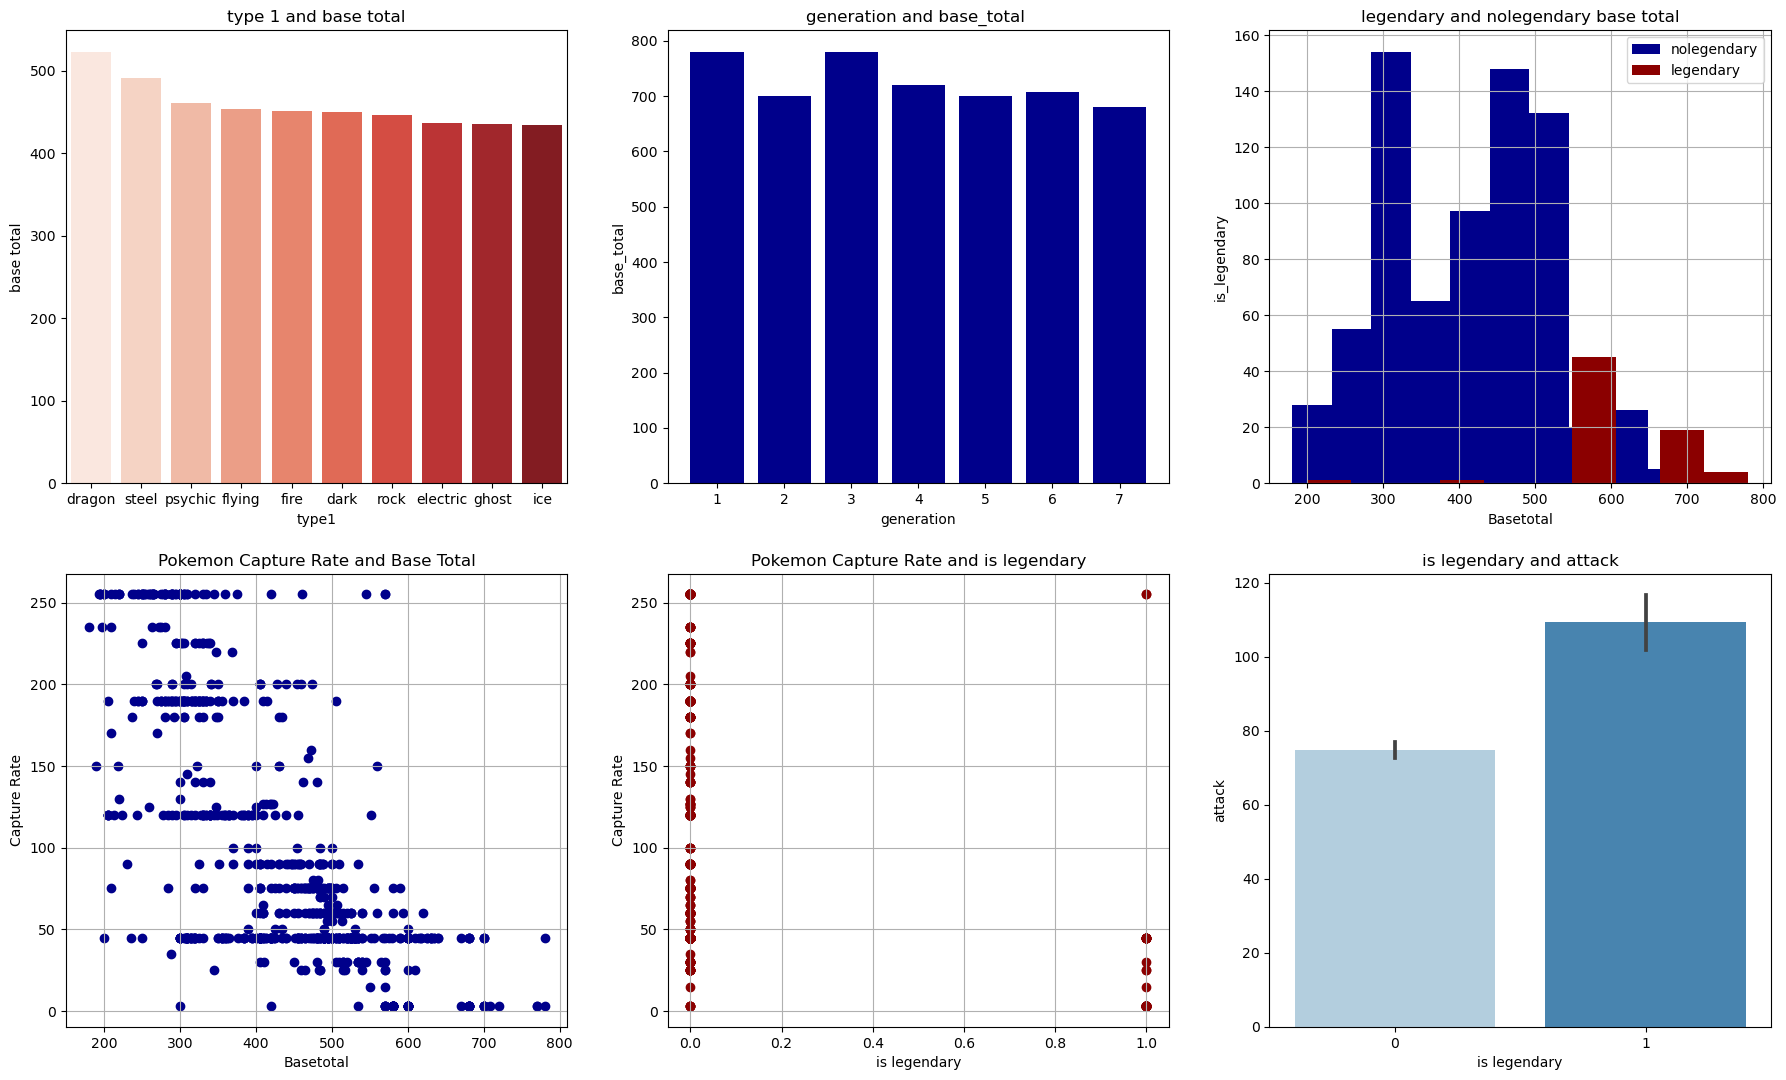

In [46]:
plt.figure(figsize=(22, 20))


plt.subplot(3, 3, 1)
sns.barplot(x='type1', y='base_total', data=dfanalyse, palette = 'Reds')
plt.title('type 1 and base total')
plt.xlabel('type1')
plt.ylabel('base total')


plt.subplot(3, 3, 2)
plt.bar(df['generation'], df['base_total'], color='darkblue')
plt.title('generation and base_total ')
plt.xlabel('generation')
plt.ylabel('base_total')

plt.subplot(3, 3, 3)
plt.hist(nolegendary,label = 'nolegendary', color = 'darkblue')
plt.hist(legendary,label = 'legendary', color = 'darkred')
plt.xlabel('Basetotal')
plt.ylabel('is_legendary')
plt.title('legendary and nolegendary base total')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 4)
plt.scatter(df['base_total'],df['capture_rate'],color='darkblue')
plt.title('Pokemon Capture Rate and Base Total')
plt.xlabel('Basetotal')
plt.ylabel('Capture Rate')
plt.grid(True)

plt.subplot(3, 3, 5)
plt.scatter(df['is_legendary'],df['capture_rate'],color='darkred')
plt.title('Pokemon Capture Rate and is legendary')
plt.xlabel('is legendary')
plt.ylabel('Capture Rate')
plt.grid(True)

plt.subplot(3, 3, 6)
sns.barplot(x='is_legendary', y='attack', data=df, palette='Blues')
plt.title('is legendary and attack')
plt.xlabel('is legendary')
plt.ylabel('attack')


plt.show()